## 1. Import libraries

In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
# Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers

In [ ]:
# Checking the tensorflow libraries  
print(tf.__version__)


2.12.0


# 2. Data exploration

In [ ]:
#Loading the dataset

housing_df = load_housing_data()

In [ ]:
housing_df.shape

(20640, 10)

In [ ]:
# Displaying the data 

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Checking for the null values 

housing_df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
#Count of the null values in each columns

housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#FIX Categories
d = {'<1H OCEAN':'LESS_1H_OCEAN', 'INLAND':'INLAND', 'ISLAND':'ISLAND', 'NEAR BAY':'NEAR_BAY', 'NEAR OCEAN':'NEAR_OCEAN'}
housing_df['ocean_proximity'] = housing_df['ocean_proximity'].map(lambda s: d[s])

In [ ]:
#add New Variables
housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]
housing_df["population_per_household"]=housing_df["population"]/housing_df["households"]

In [ ]:
#fix missing data
median = housing_df["total_bedrooms"].median()
housing_df["total_bedrooms"].fillna(median, inplace=True) 

In [ ]:
one_hot = pd.get_dummies(housing_df['ocean_proximity'])
housing_df = housing_df.drop('ocean_proximity', axis=1)
housing_df = housing_df.join(one_hot)

In [ ]:
housing_df.shape

(20640, 16)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_household       20640 non-null  float64
 10  population_per_household  20640 non-null  float64
 11  INLAND                    20640 non-null  uint8  
 12  ISLAND                    20640 non-null  uint8  
 13  LESS_1H_OCEAN             20640 non-null  uint8  
 14  NEAR_B

In [ ]:
# Dividing the dataset variables 
X=pd.DataFrame(columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity'
                        'rooms_per_household','population_per_household','INLAND','ISLAND','LESS_1H_OCEAN','NEAR_BAY','NEAR_OCEAN' ],data=housing_df)
y=pd.DataFrame(columns=['median_house_value'],data=housing_df)

In [ ]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximityrooms_per_household,population_per_household,INLAND,ISLAND,LESS_1H_OCEAN,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NaN,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NaN,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NaN,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NaN,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NaN,2.181467,0,0,0,1,0


In [ ]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


# 3. Feature Scaling and test train split

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_df, test_size=0.3, random_state=42)

In [ ]:
target = 'median_house_value'
features = list(train_set.columns)
features = [f for f in features if f!=target]

In [ ]:
X_train = train_set[features]
y_train = train_set[[target]]

X_test = test_set[features]
y_test = test_set[[target]]

In [ ]:
X_train.shape

(14448, 15)

In [ ]:
TARGET = "median_house_value"
columns_predictors = [col for col in train_set.columns if col not in [TARGET]]
columns_categorical = ['INLAND','ISLAND','LESS_1H_OCEAN','NEAR_BAY','NEAR_OCEAN']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: median_house_value
columns_predictors: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household', 'INLAND', 'ISLAND', 'LESS_1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN']
columns_categorical: ['INLAND', 'ISLAND', 'LESS_1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN']
columns_numerical: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household']


In [ ]:
#Create numerical pipeline to transform numerical values

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler

#Convert the non transformed Dataframe into list.
columns_categorical_list = list(columns_categorical)
columns_numerical_list = list(columns_numerical)

pipeline_categorical = Pipeline([
])

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical_list),
  ("numerical", pipeline_numerical, columns_numerical_list),
])

In [ ]:
pipeline_full.fit(X_train)
X_train = pipeline_full.transform(X_train)
X_test = pipeline_full.transform(X_test)
print(f"X_train transformed.shape: {X_train.shape}")
print(f"X_test transformed.shape: {X_test.shape}")

X_train transformed.shape: (14448, 20)
X_test transformed.shape: (6192, 20)


# Lets start building an Artificial Nueral Network

In [ ]:
Create_model = Sequential()

#Input Layer
Create_model.add(Dense(X_train.shape[1], activation='relu', input_dim = X_train.shape[1]))

#Hidden Layer
Create_model.add(Dense(512,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(512,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(256,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(128,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(64,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(32,kernel_initializer='normal', activation='relu'))
#Output Layer
Create_model.add(Dense(1,kernel_initializer='normal', activation = 'relu'))


In [ ]:
#Compile the network 

Create_model.compile(loss = 'MeanSquaredError', optimizer='adam', metrics=['mse','mae'])
Create_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 20)                420       
                                                                 
 dense_33 (Dense)            (None, 512)               10752     
                                                                 
 dense_34 (Dense)            (None, 512)               262656    
                                                                 
 dense_35 (Dense)            (None, 256)               131328    
                                                                 
 dense_36 (Dense)            (None, 128)               32896     
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 32)               

Create Image of your model

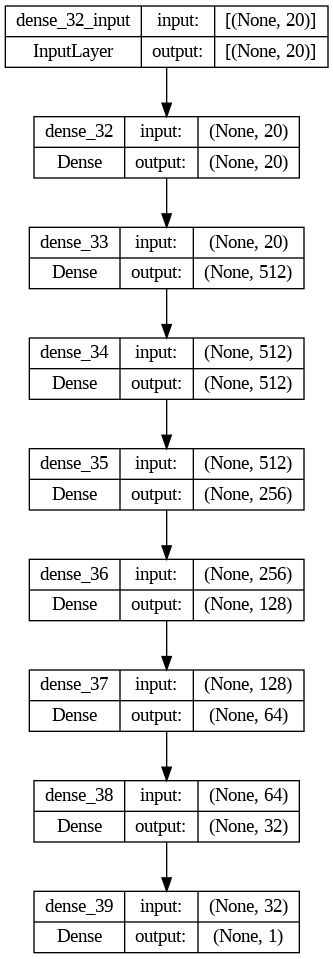

In [ ]:
tf.keras.utils.plot_model(Create_model, show_shapes=True)

In [ ]:
#library to use KerasClassifier
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

batch_size = [50,75]
epochs = [3,5]

Hyp_Model_1 = KerasRegressor(model=Create_model)

param_grid = dict(batch_size=batch_size, epochs = epochs)
randSearch_1 = GridSearchCV(Hyp_Model_1, param_grid, cv=5, scoring='neg_mean_squared_error', error_score="raise", n_jobs=-1, verbose=0)

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
history = randSearch_1.fit(X_train, y_train,verbose=0)

In [ ]:
best_params = randSearch_1.best_params_
best_estimators = randSearch_1.best_estimator_

print(best_params)
print(best_estimators)

{'batch_size': 50, 'epochs': 5}
KerasRegressor(
	model=<keras.engine.sequential.Sequential object at 0x7f2e044bc3a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=50
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=5
)


In [ ]:
y_prediction = best_estimators.predict(X_test)


124/124 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

final_mse = mean_squared_error(y_prediction, y_test)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

64202.71247622268


124/124 [==============================] - 0s 3ms/step


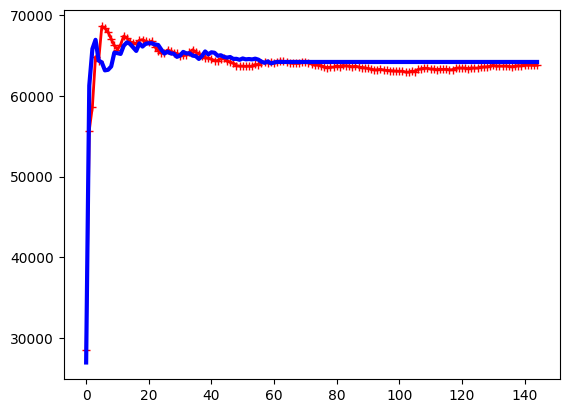

In [ ]:
# Let's graph the learning curves on the best model

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
train_errors, val_errors = [], []
for m in range(1, len(X_train), 100):
    mth_X_train_transform = X_train[:m]
    y_train_predict = best_estimators.predict(X_train[:m])
    y_val_predict = best_estimators.predict(X_test[:m])
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_test[:m]))

plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
plt.show()